# Qualité des données
### Import des dépendances

In [2]:
%matplotlib notebook

import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!{sys.executable} -m pip install openpyxl
from openpyxl import load_workbook
from openpyxl import Workbook

### Création du dataframe

In [4]:
df = pd.read_csv('clean_climat.csv', dtype={'month': np.str}, delimiter=';')
df.index += 1
df = df.drop(df.columns[[0]], axis=1)

### Récupération des informations principales du dataframe

In [5]:
print(df.head(10))
print("Moyenne par mois :")
print(np.mean(df, axis=0))
print("Ecart type :")
print(np.std(df, axis=0))
print("Min :")
print(np.min(df, axis=0))
print("Max :")
print(np.max(df, axis=0))

    janvier  février  mars  avril  mai  juin  juillet  août  septembre  \
1        -5     -7.0    -7    2.0   12  17.0       20    20       16.0   
2        -6     -6.0    -8    3.0   14  16.0       20    19       14.0   
3        -5     -5.0    -5    4.0   15  17.0       17    19       15.0   
4        -3     -6.0    -3    6.0   16  14.0       18    18       13.0   
5        -6     -8.0    -2    4.0   13  15.0       17    17       12.0   
6       -11     -9.0     1    5.0   12  17.0       17    18       10.0   
7        -6      5.0     2    4.0    8  17.0       16    16       12.0   
8        -8    -11.0     1    6.0    7  15.0       17    17       11.0   
9       -11    -12.0     1    7.0    6  14.0       17    15       11.0   
10       -8     -9.0     2    7.0    5  15.0       15    14       12.0   

    octobre  novembre  décembre  
1         6       0.0        -6  
2         2       1.0        -4  
3         3       2.0        -8  
4         4       3.0        -9  
5         3    

### Génération du graphique par mois

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


<IPython.core.display.Javascript object>


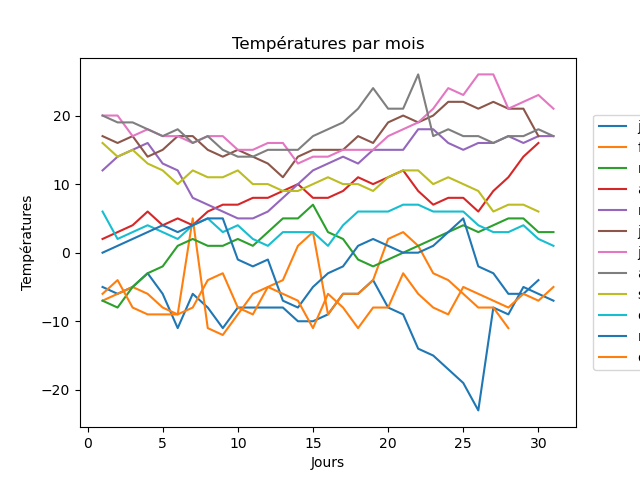

In [6]:
x = np.array(df.index)

print(x)

fig = plt.figure()
ax = fig.add_subplot(111)
for month in df.columns:
    y = np.array(df[month])
    ax.plot(x, y, label=month)
plt.title('Températures par mois')
plt.xlabel('Jours')
plt.ylabel('Températures')
ax.legend(loc='right', bbox_to_anchor=(1.3, 0.5), frameon=True)
fig.savefig('month_graph.png', bbox_inches='tight')

### Génération du graphique étalé sur l'année

<IPython.core.display.Javascript object>


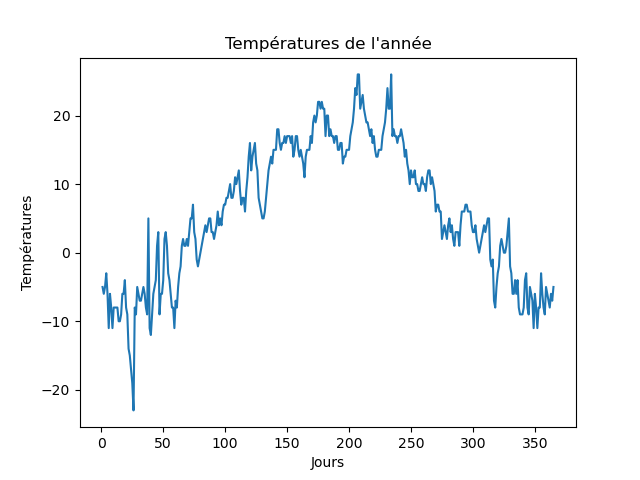

In [7]:
temperatures = []
for month in df.columns:
    temperatures.extend(df[month])

y = np.array(temperatures)
y = y[~np.isnan(y)]
x = np.array(range(1, (len(y) + 1)))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.title('Températures de l\'année')
plt.xlabel('Jours')
plt.ylabel('Températures')
fig.savefig('year_graph.png')

Lecture du fichier .XLSX contenant des erreurs

In [8]:
wb = load_workbook(filename='Climat.xlsx')
sheet = wb[wb.sheetnames[1]]

months = []

df_bis = pd.DataFrame()

for i in range(4, 16, 1):
    temp = []
    for j in range(5, 36, 1):
        temp.append(sheet.cell(row=j, column=i).value)
    df_bis[sheet.cell(row=3, column=i).value] = temp

df_bis.index += 1

print(df_bis)

    janvier  février    mars  avril  mai  juin juillet  août  septembre  \
1        -5     -7.0      -7    2.0   12    17      20    20       16.0   
2        -6     -6.0      -8    3.0   14    16      20    19       14.0   
3        -5     -5.0      -5    4.0   15    17      17    19       15.0   
4        -3     -6.0      -3    6.0   16    14      18    18       13.0   
5        -6     -8.0      -2    4.0   13    15      17    17       12.0   
6       -11     -9.0       1    5.0   12    17      17    18       10.0   
7        -6      5.0       2    4.0    8    17      16    16       12.0   
8        -8    -11.0       1    6.0    7    15      17    17       11.0   
9       -11    -12.0       1    7.0    6    14      17    15       11.0   
10       -8     -9.0       2    7.0    5   Sun      15    14       12.0   
11       -8     -6.0       1    8.0    5    14      15    14       10.0   
12       -8     -5.0       3    8.0    6    13      16    15       10.0   
13       -8     -4.0     

/opt/conda/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [108]:
months = list(df_bis)
for i in range(len(months)):
    month = months[i]
    
    # Remplacer les erreurs par la valeur précédente (sans affecter les NaN car jours non existants)
    df_bis[month] = df_bis[month].replace(np.nan, 500)
    df_bis[month] = pd.to_numeric(df_bis[month], errors='coerce').interpolate()
    df_bis[month][df_bis[month] == 500] = np.nan
    
    # Remplacer les trop grands écarts par la moyenne des valeurs précédentes et suivantes
    prevVal = df_bis[month].shift(1)
    nextVal = df_bis[month].shift(-1)
    df_bis[month] = np.where((df_bis[month] - prevVal) > 20, (prevVal + nextVal) / 2, df_bis[month])
    
print(df_bis)

    janvier  février  mars  avril  mai  juin  juillet  août  septembre  \
1        -5     -7.0  -7.0    2.0   12  17.0     20.0    20       16.0   
2        -6     -6.0  -8.0    3.0   14  16.0     20.0    19       14.0   
3        -5     -5.0  -5.0    4.0   15  17.0     17.0    19       15.0   
4        -3     -6.0  -3.0    6.0   16  14.0     18.0    18       13.0   
5        -6     -8.0  -2.0    4.0   13  15.0     17.0    17       12.0   
6       -11     -9.0   1.0    5.0   12  17.0     17.0    18       10.0   
7        -6      5.0   2.0    4.0    8  17.0     16.0    16       12.0   
8        -8    -11.0   1.0    6.0    7  15.0     17.0    17       11.0   
9       -11    -12.0   1.0    7.0    6  14.0     17.0    15       11.0   
10       -8     -9.0   2.0    7.0    5  14.0     15.0    14       12.0   
11       -8     -6.0   1.0    8.0    5  14.0     15.0    14       10.0   
12       -8     -5.0   3.0    8.0    6  13.0     16.0    15       10.0   
13       -8     -4.0   5.0    9.0    8

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Méthode utilisé : 
Pour toutes valeurs non numériques, on essaie dans un premier temps de les transformer en numérique (exemple: "=-1" en -1). Dans un second temps, pour les valeurs qui n'ont pas pu être transformées, nous définissons la température à la moyenne de la température du jour précédent et suivant.

Les données corrigées s'approchent des données correctes. La différence la plus élevée est de 1.5°C.

En comparant les écarts, nous nous apercevons que les périodes chaudes et froides correspondent à notre jeux de données. Nous pouvons en conclure qu'il s'agit des températures d'une même zone géographique. Au vu de la localisation de la station, il doit d'agir de la capitale Helsinki.